In [1]:
# work with dataframes
import pandas as pd
# plots
import matplotlib.pyplot as plt 
# clusters
from sklearn.cluster import KMeans

In [2]:
path = "/Users/travel_mechtal/Documents/UWE/Portfolio/"
data=pd.read_csv(path + "ltla_2022-02-10.csv", parse_dates=True)
#index_col="date"

In [3]:
data

,areaCode,areaName,areaType,date,age,VaccineRegisterPopulationByVaccinationDate,cumPeopleVaccinatedCompleteByVaccinationDate,newPeopleVaccinatedCompleteByVaccinationDate,cumPeopleVaccinatedFirstDoseByVaccinationDate,newPeopleVaccinatedFirstDoseByVaccinationDate,cumPeopleVaccinatedSecondDoseByVaccinationDate,newPeopleVaccinatedSecondDoseByVaccinationDate,cumPeopleVaccinatedThirdInjectionByVaccinationDate,newPeopleVaccinatedThirdInjectionByVaccinationDate,cumVaccinationFirstDoseUptakeByVaccinationDatePercentage,cumVaccinationSecondDoseUptakeByVaccinationDatePercentage,cumVaccinationThirdInjectionUptakeByVaccinationDatePercentage,cumVaccinationCompleteCoverageByVaccinationDatePercentage
0,E06000023,"Bristol, City of",ltla,2022-02-09,12_15,21532.0,3574.0,45.0,10790.0,28.0,3574.0,45.0,8.0,0.0,50.1,16.6,NaN,16.6
1,E06000023,"Bristol, City of",ltla,2022-02-09,16_17,10008.0,4445.0,8.0,6359.0,4.0,4445.0,8.0,575.0,6.0,63.5,44.4,5.7,44.4
2,E06000023,"Bristol, City of",ltla,2022-02-09,18_24,65609.0,43246.0,18.0,49219.0,25.0,43246.0,18.0,25228.0,83.0,75.0,65.9,38.5,65.9
3,E06000023,"Bristol, City of",ltla,2022-02-09,25_29,52561.0,35119.0,8.0,38023.0,11.0,35119.0,8.0,22754.0,48.0,72.3,66.8,43.3,66.8
4,E06000023,"Bristol, City of",ltla,2022-02-09,30_34,52791.0,36223.0,10.0,38679.0,4.0,36223.0,10.0,25289.0,37.0,73.3,68.6,47.9,68.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7288,E06000023,"Bristol, City of",ltla,2020-12-08,70_74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7289,E06000023,"Bristol, City of",ltla,2020-12-08,75_79,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7290,E06000023,"Bristol, City of",ltla,2020-12-08,80_84,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7291,E06000023,"Bristol, City of",ltla,2020-12-08,85_89,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
data_drop = data.drop(["areaCode", "areaName", "areaType"], axis=1)

In [5]:
dataset = data_drop.rename(columns={"newPeopleVaccinatedFirstDoseByVaccinationDate":"First", 
                                  "newPeopleVaccinatedSecondDoseByVaccinationDate":"Second", 
                                  "newPeopleVaccinatedThirdInjectionByVaccinationDate":"Third"})

In [7]:
dataset = dataset[["age", "First", "Second", "Third"]]

In [42]:
age_values = dataset["age"].unique()

"Age" is an ordinal valiable.

In [51]:
d = {"age" : age_values, "age_ord": range(0, len(age_values))}
age_ord = pd.DataFrame(data=d)

In [52]:
age_ord

,age,age_ord
0,12_15,0
1,16_17,1
2,18_24,2
3,25_29,3
4,30_34,4
5,35_39,5
6,40_44,6
7,45_49,7
8,50_54,8
9,55_59,9


In [54]:
dataset = dataset.join(age_ord.set_index('age'), on='age')

In [55]:
dataset

,age,First,Second,Third,age_ord
0,12_15,28.0,45.0,0.0,0
1,16_17,4.0,8.0,6.0,1
2,18_24,25.0,18.0,83.0,2
3,25_29,11.0,8.0,48.0,3
4,30_34,4.0,10.0,37.0,4
...,...,...,...,...,...
7288,70_74,0.0,0.0,0.0,12
7289,75_79,0.0,0.0,0.0,13
7290,80_84,0.0,0.0,0.0,14
7291,85_89,0.0,0.0,0.0,15


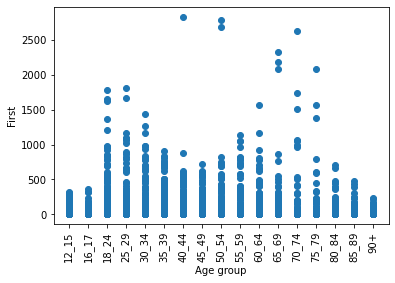

In [81]:
plt.scatter(x= dataset['age'], y=dataset['First'])
plt.xlabel('Age group')
plt.xticks(rotation=90) 
plt.ylabel('First');

In [82]:
model = KMeans(n_clusters = 5)
model.fit(dataset[["age_ord", "First"]])

KMeans(n_clusters=5)

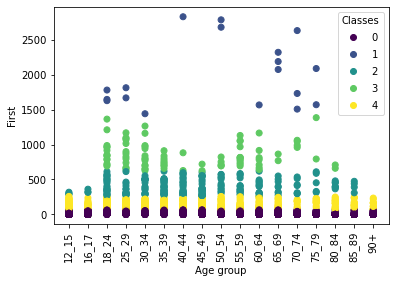

In [83]:
fig, ax = plt.subplots()

sc = plt.scatter(x= dataset['age'], y=dataset['First'], c= model.labels_)

plt.xlabel('Age group')
plt.xticks(rotation=90) 
plt.ylabel('First')


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(), title="Classes")

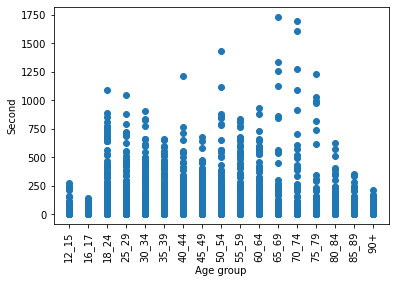

In [84]:
plt.scatter(x= dataset['age'], y=dataset['Second'])
plt.xlabel('Age group')
plt.xticks(rotation=90) 
plt.ylabel('Second');

In [85]:
model_s = KMeans(n_clusters = 5)
model_s.fit(dataset[["age_ord", "Second"]])

KMeans(n_clusters=5)

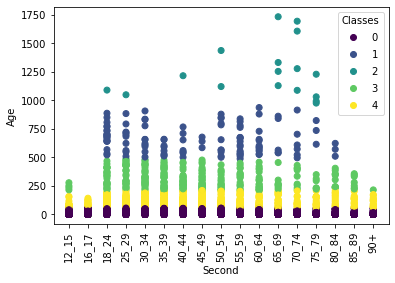

In [86]:
fig, ax = plt.subplots()

sc = plt.scatter(x= dataset['age'], y=dataset['Second'], c= model_s.labels_)

plt.xlabel('Second')
plt.xticks(rotation=90) 
plt.ylabel('Age')


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(), title="Classes")

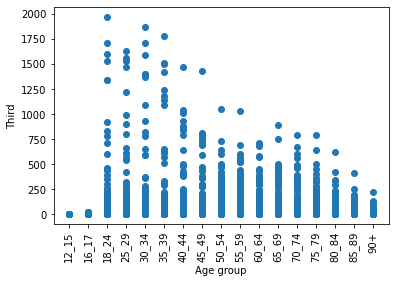

In [87]:
plt.scatter(x= dataset['age'], y=dataset['Third'])
plt.xlabel('Age group')
plt.xticks(rotation=90) 
plt.ylabel('Third');

In [88]:
model_t = KMeans(n_clusters = 5)
model_t.fit(dataset[["age_ord", "Third"]])

KMeans(n_clusters=5)

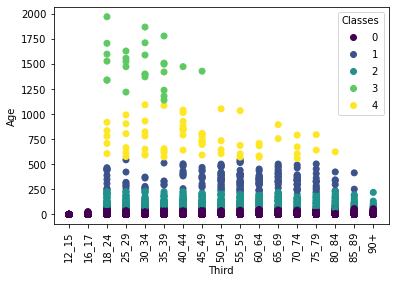

In [89]:
fig, ax = plt.subplots()

sc = plt.scatter(x= dataset['age'], y=dataset['Third'], c= model_t.labels_)

plt.xlabel('Third')
plt.xticks(rotation=90) 
plt.ylabel('Age')


# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*sc.legend_elements(), title="Classes")